In [2]:
import polars as pl
import pandas as pd
import plotnine as pn

In [3]:
df = pl.read_parquet('./data/2022.gz.parquet')
df.head()

Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,zipcode,Borough Code,BOROCODE,lng,lat
i64,str,str,cat,str,i64,cat,cat,cat,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,i64,cat,str,str,str,str,str,str,i64,i64,str,i64,str,str,str,str,str,str,cat,i64,f64,f64
1457617912,"""JEB5683""","""NY""","""PAS""","""06/25/2021""",40,"""VAN""","""FORD""","""P""",69230,13490,20221004,88,88,88,967603,88,0,"""0130A""","""0125A""","""K""","""O""","""NORTH PORTLAND AVE""",null,0,"""408""","""C4""",null,"""BBBBBBB""","""ALL""","""ALL""","""GY""",0,2007,"""-""",3,null,null,null,null,null,"""11205""","""2""",3,-73.976366,40.6952
1457622427,"""FJH6630""","""TX""","""PAS""","""06/17/2021""",98,"""SDN""","""AUDI""","""P""",47130,11750,0,88,88,88,969730,88,0,"""0809P""",null,"""K""","""F""","""SOUTH PORTLAND AVE""",null,0,"""408""","""E2""",null,"""BBBBBBB""","""ALL""","""ALL""","""WHITE""",0,0,"""-""",0,null,null,null,null,null,"""11217""","""3""",3,-73.974159,40.684166
1457638629,"""RD1Y5N""","""MO""","""PAS""","""06/16/2021""",98,"""SDN""","""TOYOT""","""P""",23230,23930,0,83,83,83,944434,83,0,"""0605P""",null,"""K""","""F""","""JEFFERSON ST""",null,0,"""408""","""C4""",null,"""BBBBBBB""","""ALL""","""ALL""","""TAN""",0,2001,"""-""",0,null,null,null,null,null,"""11206""","""2""",3,-73.934426,40.697618
1457639580,"""T503814C""","""NY""","""OMT""","""07/04/2021""",40,"""TAXI""","""HONDA""","""P""",23930,40030,20210831,83,83,83,962452,83,0,"""1058P""",null,"""K""","""F""","""STANHOPE ST""",null,0,"""408""","""F2""",null,"""BBBBBBB""","""ALL""","""ALL""","""WHI""",0,2020,"""-""",0,null,null,null,null,null,"""11221""","""3""",3,-73.925975,40.695213
1457663909,"""UMB4505""","""VA""","""PAS""","""07/02/2021""",98,"""SDN""","""SUBAR""","""P""",58330,59640,0,94,94,94,964223,94,0,"""0905A""",null,"""K""","""F""","""FREEMAN ST""",null,0,"""408""","""F2""",null,"""BBBBBBB""","""ALL""","""ALL""","""GREEN""",0,0,"""-""",0,null,null,null,null,null,"""11222""","""3""",3,-73.9537,40.734663


In [4]:
df = df.with_columns([
    pl.col('Vehicle Body Type').cast(pl.Categorical),
    pl.col('Vehicle Make').cast(pl.Categorical),
    pl.col('Plate Type').cast(pl.Categorical),
    pl.col('Issuing Agency').cast(pl.Categorical),
    pl.col('Law Section').cast(pl.Utf8).cast(pl.Categorical),
])
df.head()

Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
i64,str,str,cat,str,i64,cat,cat,cat,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,i64,cat,str,str,str,str,str,str,i64,i64,str,i64,str,str,str,str,str
1457617912,"""JEB5683""","""NY""","""PAS""","""06/25/2021""",40,"""VAN""","""FORD""","""P""",63430,69230,13490,20221004,88,88,88,967603,88,0,"""0130A""","""0125A""","""K""","""O""","""100""","""NORTH PORTLAND AVE""",null,0,"""408""","""C4""",null,"""BBBBBBB""","""ALL""","""ALL""","""GY""",0,2007,"""-""",3,null,null,null,null,null
1457617924,"""JAN2986""","""NY""","""PAS""","""06/25/2021""",20,"""SUBN""","""DODGE""","""P""",13490,40404,40404,20221203,88,88,88,967603,88,0,"""0225A""","""0215A""","""K""","""F""","""398""","""AUBURN PLACE""",null,20210625,"""408""","""E2""",null,"""BBBBBBB""","""ALL""","""ALL""","""BLU""",0,2007,"""-""",0,null,null,null,null,null
1457622427,"""FJH6630""","""TX""","""PAS""","""06/17/2021""",98,"""SDN""","""AUDI""","""P""",79430,47130,11750,0,88,88,88,969730,88,0,"""0809P""",null,"""K""","""F""","""170""","""SOUTH PORTLAND AVE""",null,0,"""408""","""E2""",null,"""BBBBBBB""","""ALL""","""ALL""","""WHITE""",0,0,"""-""",0,null,null,null,null,null
1457638629,"""RD1Y5N""","""MO""","""PAS""","""06/16/2021""",98,"""SDN""","""TOYOT""","""P""",53130,23230,23930,0,83,83,83,944434,83,0,"""0605P""",null,"""K""","""F""","""22""","""JEFFERSON ST""",null,0,"""408""","""C4""",null,"""BBBBBBB""","""ALL""","""ALL""","""TAN""",0,2001,"""-""",0,null,null,null,null,null
1457639580,"""T503814C""","""NY""","""OMT""","""07/04/2021""",40,"""TAXI""","""HONDA""","""P""",81030,23930,40030,20210831,83,83,83,962452,83,0,"""1058P""",null,"""K""","""F""","""25""","""STANHOPE ST""",null,0,"""408""","""F2""",null,"""BBBBBBB""","""ALL""","""ALL""","""WHI""",0,2020,"""-""",0,null,null,null,null,null
1457643042,"""JLN5490""","""NY""","""PAS""","""06/28/2021""",98,"""SDN""","""HONDA""","""P""",0,40404,40404,20211021,83,83,83,964362,83,0,"""1120A""",null,"""K""","""F""","""234""","""MENEHAN ST""",null,0,"""408""","""D""",null,"""BBBBBBB""","""ALL""","""ALL""","""GRY""",0,2015,"""-""",0,null,null,null,null,null
1457663909,"""UMB4505""","""VA""","""PAS""","""07/02/2021""",98,"""SDN""","""SUBAR""","""P""",42130,58330,59640,0,94,94,94,964223,94,0,"""0905A""",null,"""K""","""F""","""197""","""FREEMAN ST""",null,0,"""408""","""F2""",null,"""BBBBBBB""","""ALL""","""ALL""","""GREEN""",0,0,"""-""",0,null,null,null,null,null
1457670471,"""JPS7544""","""NY""","""PAS""","""06/19/2021""",40,"""SDN""","""NISSA""","""P""",85330,55730,73050,20220518,79,79,49,967937,49,0,"""0740P""",null,null,"""F""","""417""","""THROOP AVE""",null,0,"""408""","""E2""",null,"""BBBBBBB""","""ALL""","""ALL""","""RED""",0,2015,"""-""",0,null,null,null,null,null
1457670537,"""UPS7544""","""NY""","""PAS""","""06/19/2021""",70,"""SDN""","""NISSA""","""P""",85330,55730,73050,20220518,79,79,79,967937,79,0,"""0740P""",null,null,"""F""","""417""","""THROOP AVE""",null,0,"""408""","""E2""",null,"""BBBBBBB""","""ALL""","""ALL""","""RED""",0,2015,"""-""",0,null,null,null,null,null


## Counts

In [ ]:
df_counts = (df
    .select(['Vehicle Body Type', 'Vehicle Make', 'Plate Type', 'Issuing Agency', 'Law Section',])
    .to_pandas()
    .melt()
    .groupby(['variable', 'value'])[['value']]
    .count()
    .rename({ 'value': 'count'}, axis=1)
    .reset_index()
)
df_counts


In [ ]:
df_counts.value_counts('variable')

variable
Vehicle Make         2839
Vehicle Body Type     888
Plate Type             85
Issuing Agency         14
Law Section             6
dtype: int64

In [ ]:
pn.ggplot(df_counts, pn.aes(x = 'value', y = 'count')) + pn.geom_col() + pn.facet_wrap('variable', scales='free')

## Issuer

In [5]:
df_issuers = df.select([
    'Violation Location',
    'Violation Precinct',
    'Issuer Precinct',
    'Issuer Code',
    'Issuer Command',
    'Issuer Squad',
]).melt().to_pandas().value_counts()

In [6]:
pd.DataFrame({ 'count': df_issuers }).reset_index().value_counts('variable')

variable
Issuer Code           22683
Issuer Command          485
Issuer Precinct         441
Violation Precinct      157
Violation Location      156
Issuer Squad              1
dtype: int64

In [20]:
df.select(['Issuer Precinct']).groupby('Issuer Precinct').count().sort(pl.col('Issuer Precinct')).to_csv('precincts.csv')

/home/aljaz/Study/big-data-project/venv/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
/home/aljaz/Study/big-data-project/venv/lib/python3.10/site-packages/plotnine/layer.py:401: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.


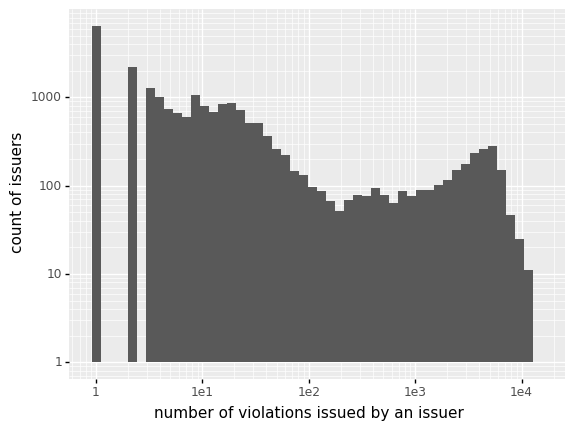

<ggplot: (8777653709912)>

In [35]:
(pn.ggplot(df.select(['Issuer Code']).groupby('Issuer Code').count().filter(pl.col('count') < 100000).to_pandas())
    + pn.geom_histogram(pn.aes(x = 'count'), bins=50)
    + pn.scale_x_log10()
    + pn.scale_y_log10()
    + pn.xlab('number of violations issued by an issuer')
    + pn.ylab('count of issuers')
)

In [36]:
df.select(['Issuer Code']).groupby('Issuer Code').count().filter(pl.col('count') > 100000)

Issuer Code,count
i64,u32
0,4896400


## Misc

In [17]:
df.select(['Violation Location']).groupby('Violation Location').count().sort(pl.col('Violation Location'))

Violation Location,count
i64,u32
null,4837632
1,208393
2,25
3,28
4,38
5,110229
6,164969
7,82949
8,22


/home/aljaz/Study/big-data-project/venv/lib/python3.10/site-packages/mizani/bounds.py:456: RuntimeWarning: overflow encountered in uint_scalars


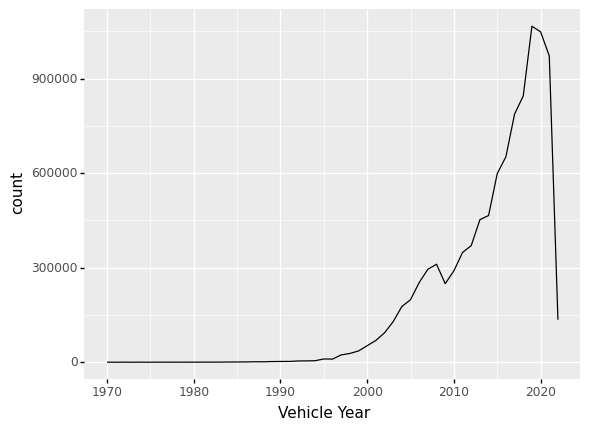

<ggplot: (8753103191920)>

In [16]:
(pn.ggplot(df
        .select('Vehicle Year')
        .filter(pl.col('Vehicle Year') > 0)
        .filter(pl.col('Vehicle Year') <= 2022)
        .groupby('Vehicle Year').count()
        .to_pandas()
    ) +
    pn.geom_line(pn.aes(x = 'Vehicle Year', y = 'count'))
)

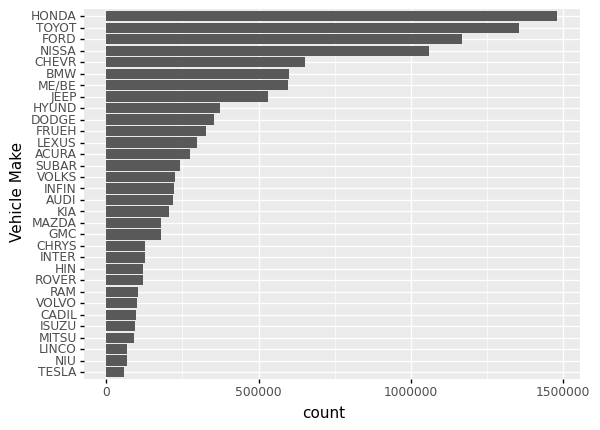

<ggplot: (8752325560708)>

In [38]:
df_makes = (df
    .select('Vehicle Make')
    .groupby('Vehicle Make')
    .count()
    .filter(pl.col('count') > 50000)
    .filter(pl.col('Vehicle Make') != None)
    .sort('count')
    .with_column(pl.col('Vehicle Make').cast(pl.Categorical))
)

(pn.ggplot(df_makes.to_pandas())
    + pn.geom_col(pn.aes(x = 'Vehicle Make', y = 'count'))
    + pn.coord_flip()
)